In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

In [3]:
data=pd.read_csv("assignment.csv")

In [4]:
data.shape

(10000, 49)

In [5]:
data.head()

,UID,Good_Bad,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,...,ASSETREGYEAR,LANDOWNERSHIP,IRRIGATIONSOURCE,CROPSCULTIVATED,DISTFROMSCELOCATION,DISTFROMDEALERLOCATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
0,1,Bad,PROF270,MADURAI,HONDA CITY 1.5 GXI PETROL 2008,900000.0,350000.0,13369.0,36.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,80000.0,17
1,2,Good,PROF218,KOLKATA,MARUTI SUZUKI EECO 7 STR PETROL 2011,400000.0,125250.0,5428.0,30.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,8000.0,27000.0,20
2,3,Good,PROF305,NAGPUR,MARUTI SUZUKI SWIFT VDI DIESEL 2013,450000.0,329250.0,8536.0,60.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,50000.0,17
3,4,Good,PROF356,AHMEDABAD,FORD ENDEAVOUR XLT 4X2 DIESEL 2008,600000.0,300000.0,11084.0,36.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,60000.0,18
4,5,Bad,PROF300,NAGPUR,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013,550000.0,429250.0,15898.0,36.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,10000.0,30000.0,53


In [6]:
data.dtypes

UID                           int64
Good_Bad                     object
CUSTOMER_PROFILE_CODE        object
LOCATIONNAME                 object
VEHICLEMODEL                 object
ASSETCOST                   float64
LOANAMOUNT                  float64
EMI                         float64
TENURE                      float64
ADDRESSCONFIRMED             object
DESIGNATION                  object
RESIDENCETYPE                object
NOOFYEARSINSAMECITY         float64
RESIDENCESTABILITY          float64
RESIDENCELOCALITY           float64
BUSINESSCATEGORY             object
BUSINESSMARGINGROSS         float64
INCOMEEMPLOYMENT            float64
STABILITYINBUSINESS         float64
STABILITYCONFIRMED           object
STABILTIYCONFIRMEDTHRU      float64
ISFAMILYINVOLVED             object
OFFICETYPE                   object
MONTHLYTURNOVER             float64
STOCKVALUEINHAND            float64
BUSINESSMARGINNET            object
NOOFEMPLOYEES                object
NAMEBOARDSEEN               

In [7]:
data.MONTHLYTURNOVER.describe()

count    9.891000e+03
mean     2.202182e+05
std      3.388825e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+04
max      2.100000e+08
Name: MONTHLYTURNOVER, dtype: float64

In [8]:
data.describe()

,UID,ASSETCOST,LOANAMOUNT,EMI,TENURE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,...,CURRENTBUSINESSSTABILITY,ASSETREGMONTH,ASSETREGYEAR,LANDOWNERSHIP,IRRIGATIONSOURCE,CROPSCULTIVATED,DISTFROMSCELOCATION,DISTFROMDEALERLOCATION,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH
count,10000.00000,9.855000e+03,9.855000e+03,9855.000000,9855.000000,9758.000000,9781.000000,9778.000000,9881.000000,9.852000e+03,...,9815.000000,0.0,9786.0,0.0,0.0,0.0,9786.0,9786.0,9.151000e+03,9.151000e+03
mean,5000.50000,5.287254e+05,3.870046e+05,12234.161542,45.119432,26.650618,78.625360,3.053385,8.111831,1.600213e+05,...,18.101189,NaN,0.0,NaN,NaN,NaN,0.0,0.0,2.829575e+04,7.112327e+04
std,2886.89568,3.183957e+05,2.386860e+05,6718.607922,12.179016,14.088494,4424.230301,0.515896,20.962192,5.049913e+06,...,706.511723,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.230618e+05,2.968032e+05
min,1.00000,0.000000e+00,5.000000e+04,1402.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.000000e+00,-2.200000e+05
25%,2500.75000,3.000000e+05,2.241250e+05,7750.000000,36.000000,20.000000,8.000000,3.000000,0.000000,4.000000e+04,...,5.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,2.500000e+01,2.800000e+04
50%,5000.50000,4.750000e+05,3.500000e+05,11114.000000,48.000000,25.000000,20.000000,3.000000,0.000000,5.900000e+04,...,10.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.200000e+04,4.000000e+04
75%,7500.25000,6.500000e+05,5.000000e+05,14918.000000,60.000000,35.000000,30.000000,3.000000,0.000000,1.000000e+05,...,15.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,2.500000e+04,6.638050e+04
max,10000.00000,7.200000e+06,3.512750e+06,103000.000000,60.000000,401.000000,411014.000000,6.000000,100.000000,5.000000e+08,...,70000.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,8.267919e+06,1.800000e+07


In [9]:
data['NETINCOMEPERMONTH']=data['NETINCOMEPERMONTH'].astype("float64").apply(lambda x: '%.5f' % x).astype("float64")

In [10]:
data['LOANAMOUNT']=data['LOANAMOUNT'].astype("float64").apply(lambda x: '%.5f' % x).astype("float64")

In [11]:
data['INCOMEEMPLOYMENT']=data['INCOMEEMPLOYMENT'].astype("float64").apply(lambda x: '%.5f' % x).astype("float64")

In [12]:
data['TOTALEXPENSEPERMONTH']=data['TOTALEXPENSEPERMONTH'].astype("float64").apply(lambda x: '%.5f' % x).astype("float64")

In [13]:
limitPer = len(data) * .80
data = data.dropna(thresh=limitPer,axis=1)

In [14]:
data.shape

(10000, 45)

In [16]:
data=data.drop(columns=["UID"],axis=1)

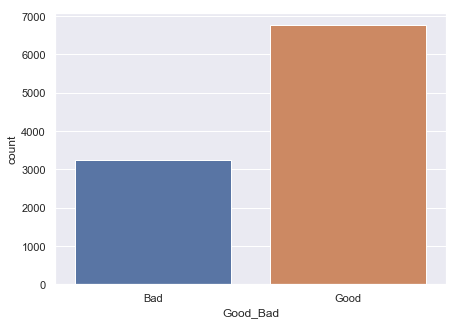

In [17]:
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(data.Good_Bad)

### Observation
#### How dependent variable is distributed can be seen by the above graph, data is slightly skewed towards good

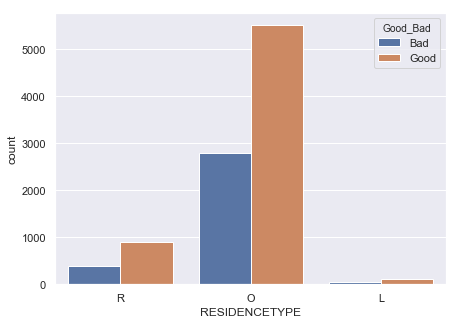

In [18]:
sns.countplot(data.RESIDENCETYPE,hue="Good_Bad",data=data)

#### Observation 2
#### Graph showing observation and relation between RESIDENCETYPE and Good_Bad

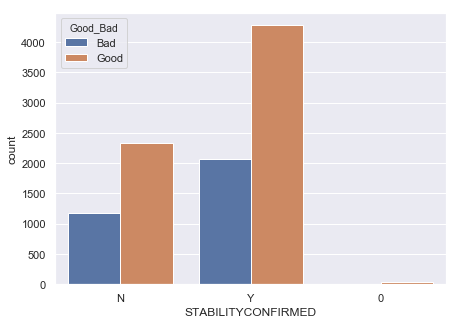

In [19]:
sns.countplot(data.STABILITYCONFIRMED,hue="Good_Bad",data=data)

#### Obeservation 3
##### Relation between GOOD / BAD loan stability confirmed

In [20]:
data.Good_Bad.value_counts("Good")

Good    0.6752
Bad     0.3248
Name: Good_Bad, dtype: float64

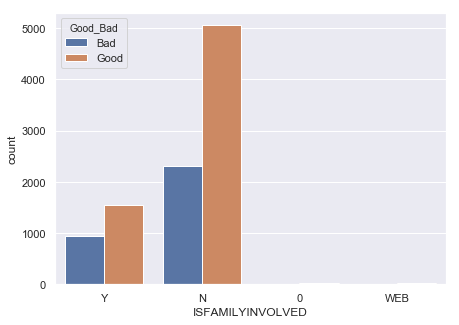

In [21]:
sns.countplot(data.ISFAMILYINVOLVED,hue="Good_Bad",data=data)

#### Obeservation 4
#### Involvement of family on the loan type and no such big information spike is obtained

In [22]:
data.DESIGNATION.unique()

array(['APPLICANT', 'SELF', 'ELDER BROTHER', 'PROPRIETOR', 'PROPREITOR',
       'HIRER', 'APPLICANT ', 'MOTHER', 'HUSBAND ', 'APPLICANT SELF ',
       'SELF APPLICANT MET', 'OWNER', 'COAPPLICANT', 'PROPERTIOR',
       'SELF ', 'BORROWER ', 'BROTHER', nan, 'GUARANTOR ', 'PROP',
       'APLICANT', 'SON', 'APPLICANT WITH CO APPLICANT', 'CO APPLICANT ',
       'self', 'APPLICNAT', 'SELF APPLICANT', 'PROPERITORYSHIP',
       'BORROWER', 'APPT', 'HUSBAND', 'MANAGING DIRECTOR', 'GUARANTER ',
       'CO APPLICANT', 'BIROTHER ', 'SELF MET', 'GURANTOR ', 'PROPRITER',
       'WIFE', 'SELF EMPLOYED', 'COBORROWER', 'GURANTER', 'FATHER',
       'COAPP', 'APPL', 'PRABHUDAS SHAHU', 'APPLICENT', 'APPICANT ',
       'APL', 'CUSTOMER ', 'EXECUTIVE ENGINEER', 'DAUGHTER', 'SPOUSE',
       'SUPERVISOR EMPLOYEE OF APP', 'SPOUS', 'AAPPLICANT', 'SPOUCE ',
       'FRIEND', 'SELF BUSINESS ', 'APP SELF', 'FARMER', 'PRORITER',
       'CUSTOMER', 'SELF AND HUSBAND', 'SPOUSE ', 'AMIT KUMAR',
       'APPLICANT SISTER

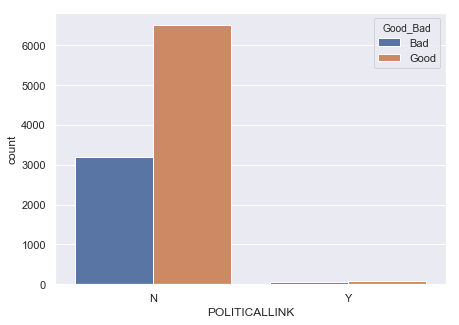

In [23]:
sns.countplot(data.POLITICALLINK,hue="Good_Bad",data=data)

#### Observation 5
#### Political link has no such big impact on the goodness of loan

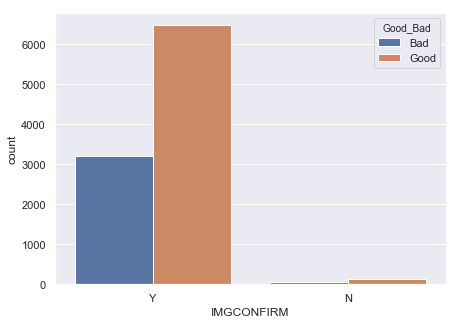

In [24]:
sns.countplot(data.IMGCONFIRM,hue="Good_Bad",data=data)

#### Observation 6
#### Image confirmed has also no such big impact on the goodness of loan

In [25]:
data.NETINCOMEPERMONTH.isnull().sum()

849

In [26]:
#Changing type of objects to category
for n,c in data.items():
    if is_string_dtype(c): data[n] = c.astype('category').cat.as_ordered()

In [27]:
#Function to replace all categorical data with numerical values and divide data into dependent and independent variables
# and it will also create a dictionary for Missing values which can be applied if there is test data
def encoder(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = data.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

In [28]:
#function which will give numerical vlues to the categorical data
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1

In [29]:
def fix_missing(df, col, name, na_dict):   
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [30]:
data.dtypes

Good_Bad                    category
CUSTOMER_PROFILE_CODE       category
LOCATIONNAME                category
VEHICLEMODEL                category
ASSETCOST                    float64
LOANAMOUNT                   float64
EMI                          float64
TENURE                       float64
ADDRESSCONFIRMED            category
DESIGNATION                 category
RESIDENCETYPE               category
NOOFYEARSINSAMECITY          float64
RESIDENCESTABILITY           float64
RESIDENCELOCALITY            float64
BUSINESSCATEGORY            category
BUSINESSMARGINGROSS          float64
INCOMEEMPLOYMENT             float64
STABILITYINBUSINESS          float64
STABILITYCONFIRMED          category
STABILTIYCONFIRMEDTHRU       float64
ISFAMILYINVOLVED            category
OFFICETYPE                  category
MONTHLYTURNOVER              float64
STOCKVALUEINHAND             float64
BUSINESSMARGINNET           category
NOOFEMPLOYEES               category
NAMEBOARDSEEN               category
O

In [31]:
new_data,y,nas=encoder(data,'Good_Bad')

In [32]:
new_data.head()

,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,...,STABILTIYCONFIRMEDTHRU_na,MONTHLYTURNOVER_na,STOCKVALUEINHAND_na,ENDUSEOFASSET_na,CURRENTBUSINESSSTABILITY_na,ASSETREGYEAR_na,DISTFROMSCELOCATION_na,DISTFROMDEALERLOCATION_na,TOTALEXPENSEPERMONTH_na,NETINCOMEPERMONTH_na
0,112,52,377,900000.0,350000.0,13369.0,36.0,2,66,3,...,False,False,False,False,False,False,False,False,False,False
1,66,47,1422,400000.0,125250.0,5428.0,30.0,2,517,2,...,False,False,False,False,False,False,False,False,False,False
2,140,54,1706,450000.0,329250.0,8536.0,60.0,2,249,2,...,False,False,False,False,False,False,False,False,False,False
3,180,5,252,600000.0,300000.0,11084.0,36.0,2,457,2,...,True,False,False,False,False,False,False,False,False,False
4,137,54,1611,550000.0,429250.0,15898.0,36.0,2,517,2,...,True,False,False,False,False,False,False,False,False,False


In [33]:
new_data.ADDRESSCONFIRMED.isnull().sum()

0

In [34]:
new_data.corr()

,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,...,STABILTIYCONFIRMEDTHRU_na,MONTHLYTURNOVER_na,STOCKVALUEINHAND_na,ENDUSEOFASSET_na,CURRENTBUSINESSSTABILITY_na,ASSETREGYEAR_na,DISTFROMSCELOCATION_na,DISTFROMDEALERLOCATION_na,TOTALEXPENSEPERMONTH_na,NETINCOMEPERMONTH_na
CUSTOMER_PROFILE_CODE,1.000000,-0.027212,-0.027174,0.049232,0.025835,0.025977,0.008221,-0.120490,-0.041795,-0.059672,...,0.016240,0.107101,0.107101,0.096293,0.106605,0.102416,0.102416,0.102416,0.063655,0.063655
LOCATIONNAME,-0.027212,1.000000,0.078176,-0.002146,-0.025641,0.004966,-0.080009,0.214448,-0.002656,0.108910,...,-0.138803,-0.210599,-0.210599,-0.180737,-0.191005,-0.183268,-0.183268,-0.183268,-0.092877,-0.092877
VEHICLEMODEL,-0.027174,0.078176,1.000000,0.148567,0.162138,0.160552,0.022092,0.234030,-0.005272,0.137531,...,-0.045565,-0.208798,-0.208798,-0.177069,-0.218516,-0.201414,-0.201414,-0.201414,-0.086819,-0.086819
ASSETCOST,0.049232,-0.002146,0.148567,1.000000,0.878764,0.821669,0.362449,0.020083,0.008158,0.030956,...,-0.000822,-0.017582,-0.017582,-0.037376,-0.016263,0.024556,0.024556,0.024556,0.172825,0.172825
LOANAMOUNT,0.025835,-0.025641,0.162138,0.878764,1.000000,0.925872,0.439780,0.018261,0.025616,0.037417,...,0.004132,-0.016155,-0.016155,-0.029694,-0.015007,0.016839,0.016839,0.016839,0.137690,0.137690
EMI,0.025977,0.004966,0.160552,0.821669,0.925872,1.000000,0.137072,0.019527,0.001511,0.043487,...,-0.001776,-0.017372,-0.017372,-0.036424,-0.020653,0.016285,0.016285,0.016285,0.145555,0.145555
TENURE,0.008221,-0.080009,0.022092,0.362449,0.439780,0.137072,1.000000,-0.027981,0.043085,-0.027400,...,0.025434,0.024640,0.024640,0.045550,0.038483,0.041565,0.041565,0.041565,0.040316,0.040316
ADDRESSCONFIRMED,-0.120490,0.214448,0.234030,0.020083,0.018261,0.019527,-0.027981,1.000000,0.149983,0.503016,...,-0.170893,-0.842187,-0.842187,-0.708966,-0.859385,-0.797589,-0.797589,-0.797589,-0.390039,-0.390039
DESIGNATION,-0.041795,-0.002656,-0.005272,0.008158,0.025616,0.001511,0.043085,0.149983,1.000000,0.072161,...,-0.133374,-0.138135,-0.138135,-0.164736,-0.157576,-0.121975,-0.121975,-0.121975,-0.010228,-0.010228
RESIDENCETYPE,-0.059672,0.108910,0.137531,0.030956,0.037417,0.043487,-0.027400,0.503016,0.072161,1.000000,...,-0.155867,-0.445069,-0.445069,-0.618741,-0.516566,-0.425535,-0.425535,-0.425535,-0.192599,-0.192599


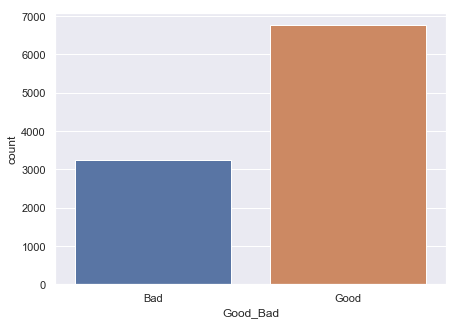

In [35]:
sns.countplot(data.Good_Bad)

Text(0, 0.5, 'Importance')

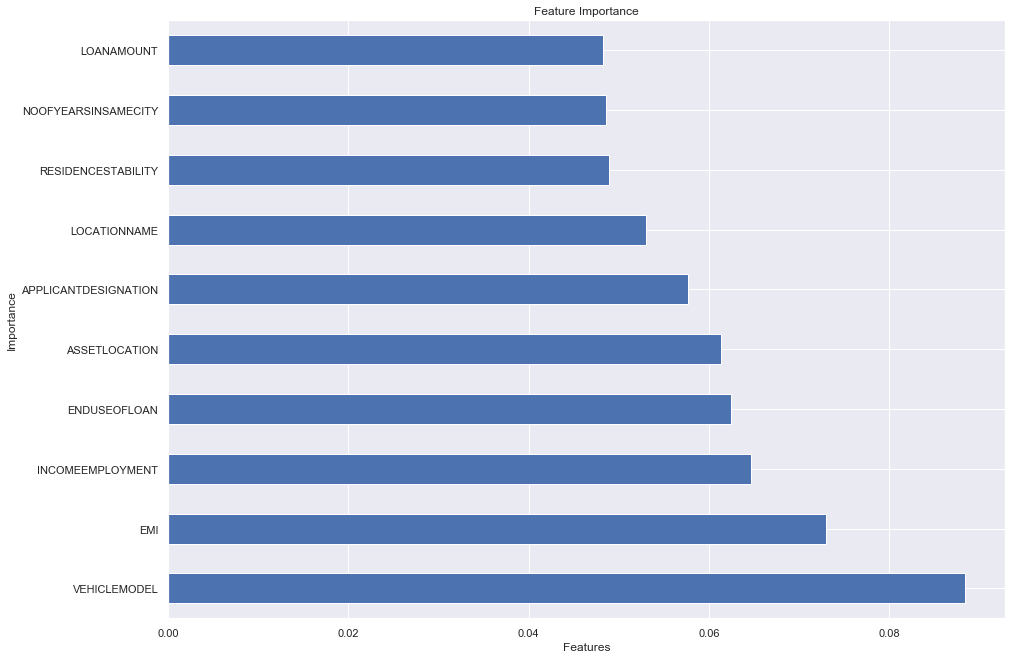

In [36]:
#Feature importance plotting
from sklearn.ensemble import RandomForestRegressor

names=list(new_data)
names = names[1:40]

fea = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(new_data.iloc[:,1:40],y)
sns.set(rc={'figure.figsize':(15,11)})
feature=pd.Series(fea.feature_importances_, index=names)
feature.nlargest(10).plot(kind='barh')

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

#### Vechile model gives good information followed by emi and many more shown in above graph